<a href="https://colab.research.google.com/github/avichal7/avichal/blob/master/Copy_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class MyLinearRegression:
    def __init__(self, weight=1, bias=1.0, learning_rate=0.06,
                 iterations=4000):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, xfeature):
        predicted_set = []
        for i in range(len(xfeature)):
            predicted_value = self.weight * xfeature[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, xfeature, yfeature):
        count = len(xfeature)
        total_error = 0.0
        for i in range(count):
            total_error += (yfeature[i] - (self.weight * xfeature[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, xfeature, yfeature):
        weight_deriv = 0
        bias_deriv = 0
        count = len(xfeature)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * xfeature[i] * (yfeature[i] -
                                                (self.weight * xfeature[i] +
                                                 self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (yfeature[i] - (self.weight * xfeature[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, xfeature, yfeature):
        for i in range(self.iterations):
            self.update_weights(xfeature, yfeature)
            # Calculating cost
            self.cost = self.cost_function(xfeature, yfeature)
            self.cost_trend.append(self.cost)
            
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".
              format(i, self.weight, self.bias, self.cost))

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [0]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, 1].values

In [43]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [37.55635]	 Bias: [6.682]	 Cost: 13892.324159556752
Iteration: 1	 Weight: [-79.24257723]	 Bias: [-11.45800955]	 Cost: 141667.99577176105
Iteration: 2	 Weight: [293.92544682]	 Bias: [46.51250298]	 Cost: 1445988.1769277544
Iteration: 3	 Weight: [-898.34064927]	 Bias: [-138.68880521]	 Cost: 14760346.947502824
Iteration: 4	 Weight: [2910.92258527]	 Bias: [453.0384824]	 Cost: 150671875.4381171
Iteration: 5	 Weight: [-9259.59578303]	 Bias: [-1437.50513196]	 Cost: 1538041999.2915673
Iteration: 6	 Weight: [29624.95403004]	 Bias: [4602.75461453]	 Cost: 15700165565.528633
Iteration: 7	 Weight: [-94610.37156813]	 Bias: [-14695.73684023]	 Cost: 160265585028.56473
Iteration: 8	 Weight: [302318.89453631]	 Bias: [46962.55178322]	 Cost: 1635973688179.6855
Iteration: 9	 Weight: [-965861.81404463]	 Bias: [-150034.37967224]	 Cost: 16699841754240.234
Iteration: 10	 Weight: [3085949.03479383]	 Bias: [479366.70917868]	 Cost: 170470171148739.0
Iteration: 11	 Weight: [-9859501.91950443]	

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square


Iteration: 465	 Weight: [-1.05277797e+236]	 Bias: [-1.63536655e+235]	 Cost: inf
Iteration: 466	 Weight: [3.36360359e+236]	 Bias: [5.22496195e+235]	 Cost: inf
Iteration: 467	 Weight: [-1.07466431e+237]	 Bias: [-1.66936442e+236]	 Cost: inf
Iteration: 468	 Weight: [3.43353002e+237]	 Bias: [5.33358442e+236]	 Cost: inf
Iteration: 469	 Weight: [-1.09700566e+238]	 Bias: [-1.70406907e+237]	 Cost: inf
Iteration: 470	 Weight: [3.50491016e+238]	 Bias: [5.44446506e+237]	 Cost: inf
Iteration: 471	 Weight: [-1.11981147e+239]	 Bias: [-1.7394952e+238]	 Cost: inf
Iteration: 472	 Weight: [3.57777423e+239]	 Bias: [5.55765081e+238]	 Cost: inf
Iteration: 473	 Weight: [-1.14309139e+240]	 Bias: [-1.77565781e+239]	 Cost: inf
Iteration: 474	 Weight: [3.65215308e+240]	 Bias: [5.67318959e+239]	 Cost: inf
Iteration: 475	 Weight: [-1.16685527e+241]	 Bias: [-1.81257221e+240]	 Cost: inf
Iteration: 476	 Weight: [3.7280782e+241]	 Bias: [5.79113033e+240]	 Cost: inf
Iteration: 477	 Weight: [-1.19111319e+242]	 Bias: [-1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in subtract



Iteration: 704	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 705	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 706	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 707	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 708	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 709	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 710	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 711	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 712	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 713	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 714	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 715	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 716	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 717	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 718	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 719	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 720	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 721	 Weight: [nan]	 Bias: [nan]	 Cost: nan
Iteration: 722	 Weight: [na

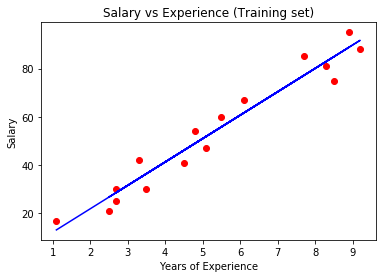

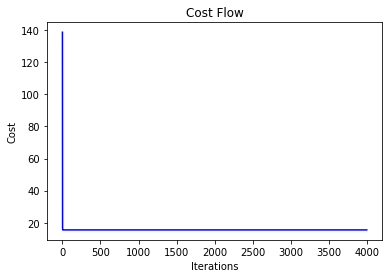

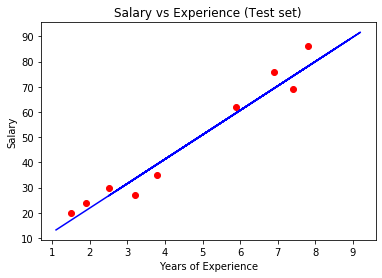

In [39]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.plot(regressor.cost_trend, color='blue')
plt.title('Cost Flow')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()